# Decision Tree Classifier, Random Forest Classifier on Game Prediction

#### Dataset from "SteamSpy" based on Steam with estimated number of Owners per game. 
Source: "https://steamspy.com/"

### Import the necessary modules and loaded the data into a Pandas DataFrame named data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [13]:
data = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appid                  41308 non-null  int64  
 1   name                   41308 non-null  object 
 2   developer              41308 non-null  object 
 3   publisher              41308 non-null  object 
 4   score_rank             41308 non-null  object 
 5   positive               41308 non-null  int64  
 6   negative               41308 non-null  int64  
 7   userscore              41308 non-null  int64  
 8   owners                 41308 non-null  int64  
 9   average_forever        41308 non-null  int64  
 10  average_2weeks         41308 non-null  int64  
 11  median_forever         41308 non-null  int64  
 12  median_2weeks          41308 non-null  int64  
 13  price                  41308 non-null  float64
 14  initialprice           41308 non-null  float64
 15  di

In [14]:
data.describe()

,appid,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,...,Indie,Free To Play,RPG,Strategy,Sports,Simulation,Racing,Massivley Multiplayer,Act_Adv,review
count,4.130800e+04,4.130800e+04,41308.000000,41308.000000,4.130800e+04,41308.000000,41308.000000,41308.000000,41308.000000,41308.000000,...,41308.000000,41308.0,41308.000000,41308.000000,41308.000000,41308.000000,41308.000000,41308.0,41308.000000,41308.000000
mean,8.096821e+05,1.362381e+03,231.833107,0.088796,1.729997e+05,175.028033,6.868960,159.013532,7.043188,6.988034,...,0.738186,0.0,0.170814,0.193207,0.050668,0.195120,0.036748,0.0,0.638254,68.059625
std,3.598324e+05,3.110861e+04,6040.278945,2.659110,1.588070e+06,2403.589123,107.629267,2551.579873,110.290004,10.467973,...,0.439627,0.0,0.376351,0.394819,0.219322,0.396298,0.188146,0.0,0.480512,27.823349
min,3.000000e+02,0.000000e+00,0.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5.175075e+05,5.000000e+00,1.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.990000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,54.000000
50%,8.047550e+05,2.100000e+01,7.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,4.900000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,75.000000
75%,1.101762e+06,1.210000e+02,38.000000,0.000000,5.000000e+04,2.000000,0.000000,2.000000,0.000000,9.900000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,89.000000
max,1.769630e+06,5.540107e+06,875035.000000,100.000000,2.000000e+08,245061.000000,8870.000000,245061.000000,8870.000000,999.900000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,100.000000


### I split the data into 2 DataFrames named x and y
#### x contains the Predictor Variables and y contains the Response Variables

In [3]:
y = pd.DataFrame(data["owner_cat"])
x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
                       '18+', 'Indie', 'Free To Play', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing',
                       'Massivley Multiplayer', 'Act_Adv']])

In [4]:
# Further split dataset into train and test dataframes for x and y.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (30981, 1) (30981, 14)
Test Set  : (10327, 1) (10327, 14)


### Create Decision Tree Classifier

In [5]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()




Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8054291339853459

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7463929505180594



### Plot the Confusion Matrix for Train and Test

Train data set: 


<AxesSubplot:>

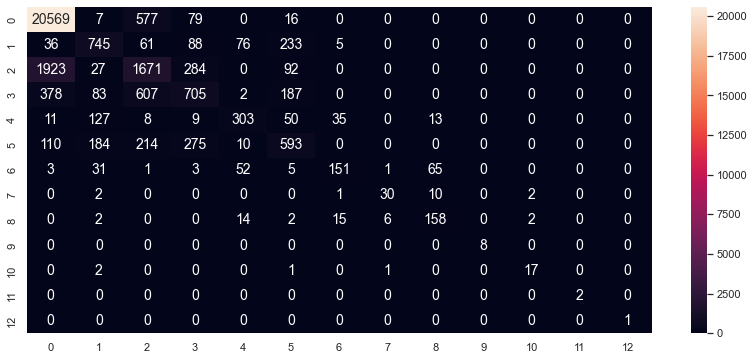

In [11]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

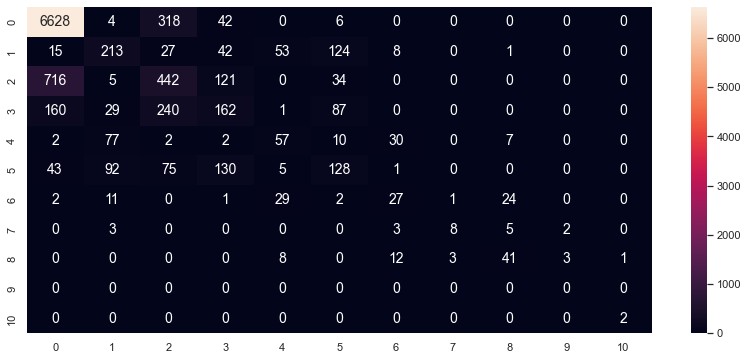

In [15]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

### Plotting Decision Tree - Predicting 12 different classes of different owner sizes, 

In [ ]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["0","1","2","3", "4","5","6","7","8","9","10","11","12"])